# *Assignment #7*
## **[CSCI 581](https://www.ecst.csuchico.edu/~bjuliano/csci581/)**, Fall 2021

Ryota Haba

# Finding clusters in the Iris dataset

You will be treating the [Iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html), available from Scikit-learn, as unlabeled data to perform clustering via the [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) estimator.

## Overview

Scikit-learn's [Iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) is labeled data that we have used in supervised learning. To use it as unlabeled data for unsupervised learning, you will need to drop the last column from the training set before running the `fit()` method on an instance of the [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) estimator.

## Instructions

1.   Since we already know there are three varieties of Irises embodied in the [Iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html), use the whole unlabeled dataset with $k=3$ on an instance of the [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) estimator. Evaluate the performance of the model using as many metrics as you deem appropriate.
2.   Confirm if $k=3$ is the optimum value for $k$ on the unlabeled version of the [Iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html). Use the Silhouette Coefficient as a metric similar to the examples shown in our [PML 10 jupyter notebook](https://colab.research.google.com/gist/bjuliano/ad20bea98c646a2ccd522b4a91a70783/pml-10-unsupervised-learning-clustering-using-k-means.ipynb).
3. Summarize all your findings and present your conclusions regarding the use of this algorithm on the [Iris dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html).




## Required components of your submission 

Your *Google Colab* Jupyter notebook must include:

1.   all pertinent *exploratory data analysis* (EDA) code, visualizations, and justifications (you can reuse, perhaps with minimal modification, the work you did in your earlier Assignments);
2.   explanations/justifications for all model selection decisions;
3.   all pertinent model diagnostics, including metrics and visualizations; and
4.   your summary and conclusions pertaining to how the two models compare against each other.

Be sure to check out or review the *Assignments/Projects* section of our [*Blackboard*](https://learn.csuchico.edu/) course page for details regarding expectations, requirements, and the [*Jupyter Notebook Rubric*](https://www.ecst.csuchico.edu/~bjuliano/Teaching/rubric-jupyter-notebook.pdf) that will be used to evaluate Jupyter notebook submissions.



# Solution

##Exploratory data analysis

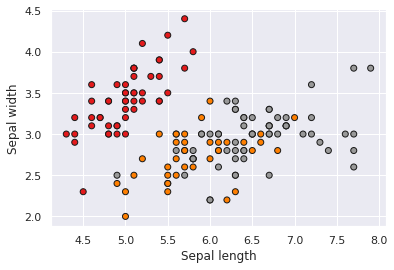

In [21]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Load the Iris dataset
iris = datasets.load_iris()
features = iris.data
expected  = iris.target

plt.scatter(features[:, 0], features[:, 1], c=expected, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()

There seems to be a cluster of red dots in upper left of the above plot. Green and yellow dots seem mixed.

The below plots shows Petal length vs Petal width of each species.

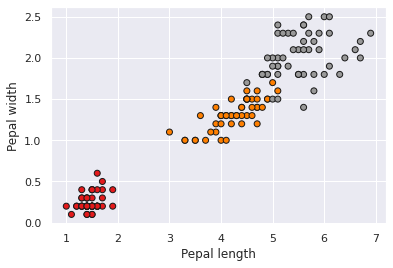

In [23]:
plt.scatter(features[:, 2], features[:, 3], c=expected, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Pepal length")
plt.ylabel("Pepal width")
plt.show()

Again, there seems to be a red cluster. Also, it seems that there are two centroids for yellow and green cluster. 

##K-Means with K = 3

Since the dataset constain three species, I will set k = 3 for k-means model building.


Target names: ['setosa' 'versicolor' 'virginica']

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        50
           2       0.26      0.28      0.27        50

    accuracy                           0.09       150
   macro avg       0.09      0.09      0.09       150
weighted avg       0.09      0.09      0.09       150

Silhouette coefficient = 0.45994823920518635
Calinski-Harabasz index = 241.90440170183157


Text(89.18, 0.5, 'true label')

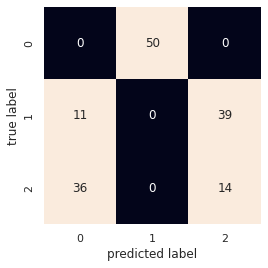

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,classification_report

# Standardize features as Gaussian with 0 mean and unit variance
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

# Create k-mean object
cluster = KMeans(n_clusters=3 ,
                 random_state=5
                )

# Train model
model = cluster.fit(features_std)

# Display what the target names are, to align with the index values for target
print( '\nTarget names:', iris.target_names )
print()

# Evaluate the model
predicted = model.predict(features_std)

print(classification_report(expected, predicted))


from sklearn.metrics import silhouette_score,calinski_harabasz_score

print( 'Silhouette coefficient =',
      silhouette_score(features_std, model.labels_, metric='euclidean') )
print( 'Calinski-Harabasz index =',
      calinski_harabasz_score(features_std, model.labels_) )

mat = confusion_matrix(expected, predicted)
sns.heatmap(mat, vmax=5, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('predicted label');
plt.ylabel('true label')



The classification report show very poor performance with accuracy of 0.09. However, this is because the true label and predicted label are not matched. If you could swap the columns in the cunfusion metrix, it will show the accurate matrix. So the model is not bad as it looks. I could not figure out the way to match the labels.

##Silhouette Coefficient 

I will try k value from 2 to 10.

Silhouette Coefficients for k = 2 is 0.5817500491982808
Silhouette Coefficients for k = 3 is 0.45994823920518635
Silhouette Coefficients for k = 4 is 0.3882200962165986
Silhouette Coefficients for k = 5 is 0.34551099599809465
Silhouette Coefficients for k = 6 is 0.3256773128015377
Silhouette Coefficients for k = 7 is 0.3177099463855021
Silhouette Coefficients for k = 8 is 0.3414684788667476
Silhouette Coefficients for k = 9 is 0.34915627620997486
Optimal K is  2


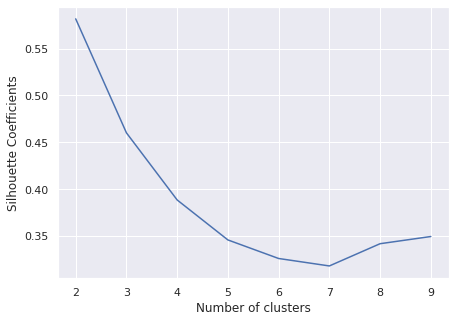

In [10]:
from sklearn import metrics
silhouette_avgs = []
min_k = 2

#---try k from 2 to 10---
for k in range(min_k, 10):
    kmean = KMeans(n_clusters=k).fit(features_std)
    score = metrics.silhouette_score(features_std, kmean.labels_)
    print("Silhouette Coefficients for k =", k, "is", score)
    silhouette_avgs.append(score)

# Plot the results as Silhouette Coefficient x number of clusters

f, ax = plt.subplots(figsize=(7, 5))
ax.plot(range(min_k, 10), silhouette_avgs)

plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficients")

#---the optimal k is the one with the highest average silhouette---
Optimal_K = silhouette_avgs.index(max(silhouette_avgs)) + min_k
print("Optimal K is ", Optimal_K)

The above experiment indicates 2, rather than 3, is the optimal number of cluster for the dataset. This makes sense because yellow and green dots in exploratory data analysis are clother to each other than red dots.  

##Conclusions

In this assingment, we appleid K-means clustering method to iris dataset. The experiment with Silhouette coefficient indicated that 2 clusters is more appropriate than 3. 